## Libraries

For creating this chart, we will need to load the following libraries:

- [pandas](https://python-graph-gallery.com) for data manipulation
- [matplotlib](https://python-graph-gallery.com) for creatin the chart
- `numpy` for smoothing the chart


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

The dataset can be accessed using the **url below**.

It contains data about **x-men** and the number of times they appeared in the comics between the 60's and the 90's.


In [7]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mutant_moneyball.csv'
df = pd.read_csv(url)

## Data cleaning

In order to make the data ready for the chart, we will need to clean it a bit.

### Name of the x-men

Since the name of the x-men is written in **camelCase**, we will need to split it into two words. For example, _scottSummers_ will become _Scott Summers_.


In [4]:
def format_name(s):
    if " " in s:
        return s
    formatted_string = ""
    for i, char in enumerate(s):
        if char.isupper() and i != 0:
            formatted_string += " " + char
        else:
            formatted_string += char
    if formatted_string:
        formatted_string = formatted_string[0].upper() + formatted_string[1:]

    return formatted_string


df['Member'] = df['Member'].apply(format_name)

df = df[['Member', 'TotalIssues60s', 'TotalIssues70s',
         'TotalIssues80s', 'TotalIssues90s']]
df.set_index('Member', inplace=True)

### Transpose the data

The data is currently in a **wide format**, which means that one row represent one x-men and the columns represent the value for eachd decade.

We will need to transpose it to a **long format**, where each row represents a decade and the columns represent the x-men.


In [5]:
# transpose the dataframe
df_transposed = df.T

decades = ['1960s', '1970s', '1980s', '1990s']  # values of the x-axis
members = df_transposed.columns  # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist()  # values of the x-men

In [6]:
df_transposed

Member,Warren Worthington,Hank Mc Coy,Scott Summers,Bobby Drake,Jean Grey,Alex Summers,Lorna Dane,Ororo Munroe,Kurt Wagner,Logan Howlett,...,Rachel Summers,Eric Magnus,Alison Blaire,Longshot,Jonathan Silvercloud,Remy Le Beau,Jubilation Lee,Lucas Bishop,Betsy Braddock,Charles Xavier
TotalIssues60s,61,62,63,62,63,8,9,0,0,0,...,0,13,0,0,0,0,0,0,0,39
TotalIssues70s,35,38,69,35,58,13,13,36,36,36,...,0,7,0,0,0,0,0,0,0,46
TotalIssues80s,20,9,56,6,14,43,19,121,84,115,...,23,18,43,35,11,0,6,0,45,61
TotalIssues90s,23,10,9,20,29,4,7,33,0,16,...,1,3,2,0,28,17,17,16,14,23


## Simple streamgraph

Thanks to the `stackplot()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/), it is possible to create a simple streamgraph.


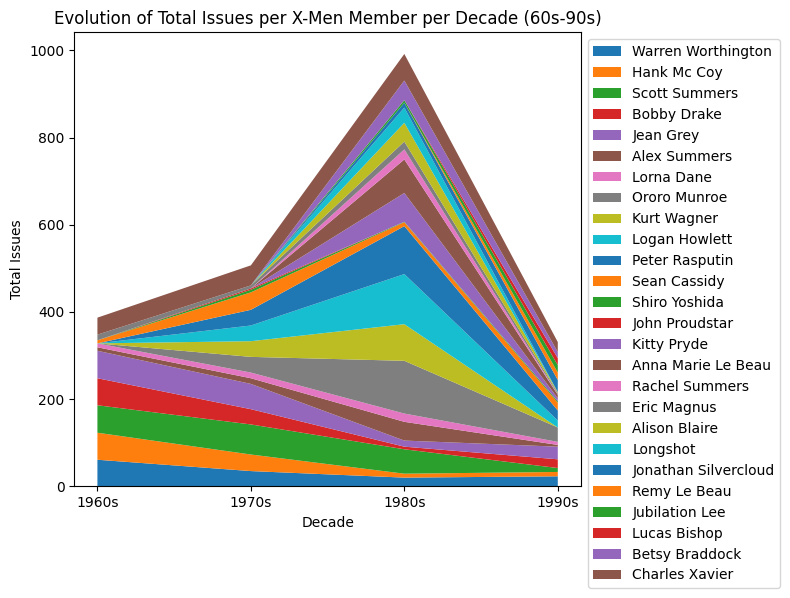

In [6]:
decades = ['1960s', '1970s', '1980s', '1990s']  # values of the x-axis
members = df_transposed.columns  # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist()  # values of the x-men

fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(decades, issues_list, labels=members)
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

## Custom colors

The color we will use is **based on the value of the total** number of appearances, which means that we have to compute it first.

Then, we create a **list of colors** using the `cm` module from `matplotlib`.


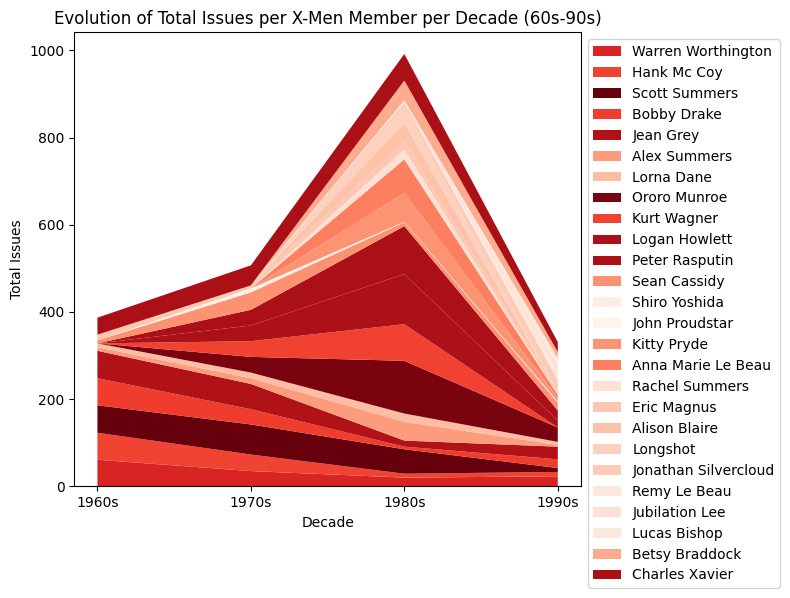

In [7]:
decades = ['1960s', '1970s', '1980s', '1990s']  # values of the x-axis
members = df_transposed.columns  # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist()  # values of the x-men

# calculate the normalized totals to generate the colors
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(decades, issues_list, labels=members, colors=colors)
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

## Custom order

If we want to change the order in which x-men are displayed, we can use the `argsort()` function from `numpy`.

It will gives us the index of the x-men, **sorted** by the total number of appearances. Then, we can **use this index to reorder** the list of values, name and colors.


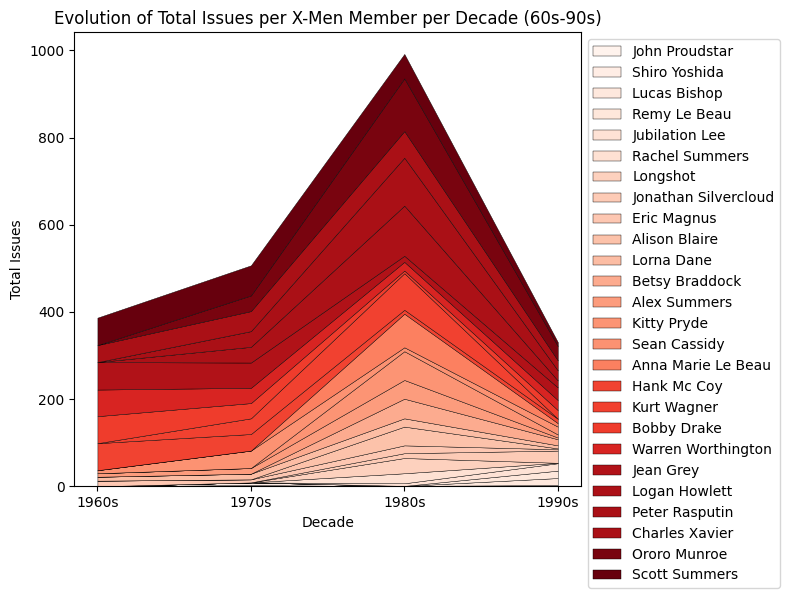

In [8]:
# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

# sort the members by total issues
sorted_indices = np.argsort(total_issues_per_member)
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]

# plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(
    decades,
    sorted_issues_list,
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.3
)

# setting the title and labels
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plotting
fig.tight_layout()
plt.show()

## Change stream style

If you want to **smooth the stream**, we need to use the `interp1d` function from `scipy`.

This function is a bit particular since it is used to **create a function** that can be used to **interpolate** the data. We give it a list of x and y values, and it returns a function that can be used to **get the y value for any x value**.

Then, we can use this function to create a **new list of y values** that will be used to create the streamgraph.


In [9]:
from scipy.interpolate import interp1d

# instead of 4 date points, we will use 40
decadesforsmooth = [1960, 1970, 1980, 1990]
new_decades = np.linspace(min(decadesforsmooth), max(
    decadesforsmooth), len(decadesforsmooth) * 10)

# interpolating each member's issues list for the new_decades
smoothed_issues_list = []
for issues in sorted_issues_list:
    interp_func = interp1d(
        decadesforsmooth,
        issues,
        kind='quadratic'
    )
    smoothed_issues = interp_func(new_decades)
    smoothed_issues_list.append(smoothed_issues)

Then, the rest of the code mainly **stays the same**. We just add a `baseline='wiggle'` argument to the `stackplot()` function to make the streamgraph look better.


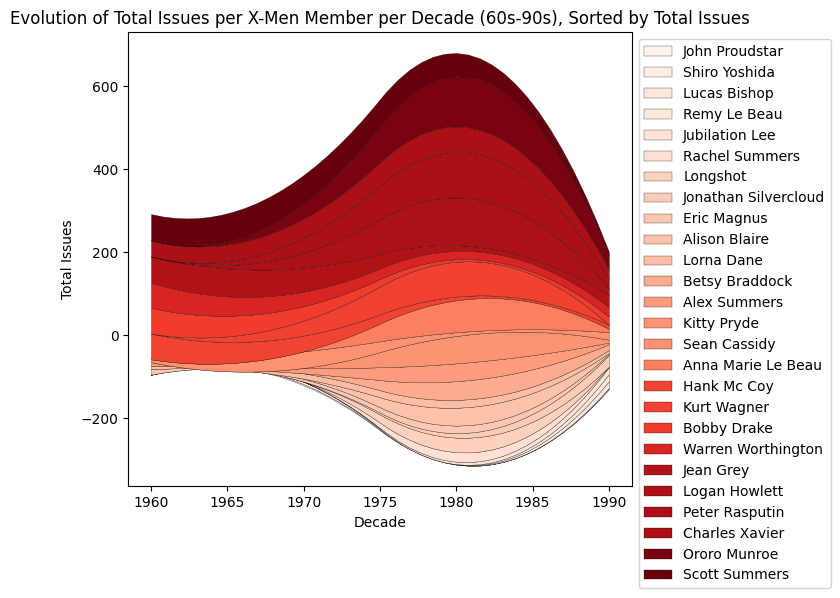

In [10]:

# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

# sort the members by total issues
sorted_indices = np.argsort(total_issues_per_member)
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_issues_list = [sublist[:-1] for sublist in sorted_issues_list]

# create the chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.stackplot(
    new_decades,
    smoothed_issues_list,
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.2,
    baseline='wiggle'
)

# setting the title and labels
ax.set_title(
    'Evolution of Total Issues per X-Men Member per Decade (60s-90s), Sorted by Total Issues')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plotting
fig.tight_layout()
plt.show()

## Going further

This article explains how to create a [streamgraph](https://python-graph-gallery.com/streamchart/) and how to **customize** it.

You might want to check this [beautiful streamgraph](https://python-graph-gallery.com/web-streamchart-with-matplotlib/) entirely built with [matplotlib](https://python-graph-gallery.com/matplotlib/).
